In [1]:
import keras
from keras.datasets import reuters

In [5]:
(train_features,train_labels), (test_features,test_labels) = reuters.load_data(num_words=10000)

In [8]:
import numpy as np
def multi_hot_encode(sequences,num_classes):
    results = np.zeros((len(sequences),num_classes))
    for i,seq in enumerate(sequences):
        results[i][seq] = 1.0
    return results

In [9]:
xtrain = multi_hot_encode(train_features,10000)
xtest = multi_hot_encode(test_features,10000)

In [10]:
from keras.utils import to_categorical
ytrain = to_categorical(train_labels)
ytest = to_categorical(test_labels)

In [11]:
ytrain.shape

(8982, 46)

In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(46,activation='softmax'),
])

In [13]:
top_3_accuracy = keras.metrics.TopKCategoricalAccuracy(
    k=3,
    name = 'top_3_accuracy',
)

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy',top_3_accuracy],
)

In [15]:
history = model.fit(
    xtest,ytrain,epochs=20,batch_size=512,validation_split=0.2
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.2416 - loss: 3.7203 - top_3_accuracy: 0.3692 - val_accuracy: 0.3489 - val_loss: 3.5127 - val_top_3_accuracy: 0.5622
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3419 - loss: 3.3538 - top_3_accuracy: 0.5763 - val_accuracy: 0.3489 - val_loss: 3.1698 - val_top_3_accuracy: 0.5689
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3419 - loss: 3.0236 - top_3_accuracy: 0.5974 - val_accuracy: 0.3489 - val_loss: 2.9413 - val_top_3_accuracy: 0.6022
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3430 - loss: 2.7824 - top_3_accuracy: 0.6247 - val_accuracy: 0.3444 - val_loss: 2.8005 - val_top_3_accuracy: 0.6156
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4042 - loss: 2.5862 - top_3_accuracy: 0.6437 - val_accuracy: 0.3444 - val_loss: 2.7047 - val_top_3_accuracy: 0.6178
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4187 - loss: 2.3971 - top_3_accuracy: 0.68

In [16]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['accuracy', 'loss', 'top_3_accuracy', 'val_accuracy', 'val_loss', 'val_top_3_accuracy'])

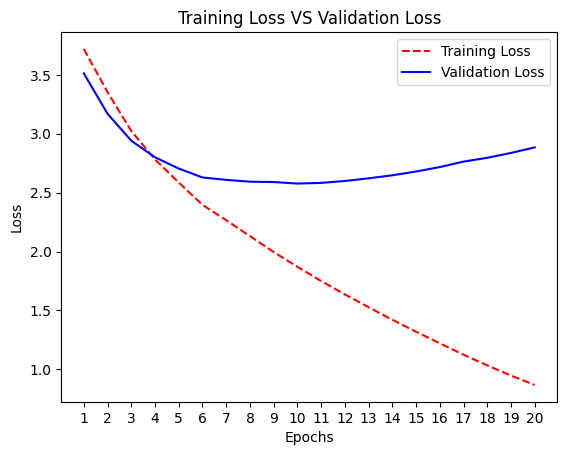

In [17]:
import matplotlib.pyplot as plt
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'r--',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xticks(epochs)
plt.title('Training Loss VS Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

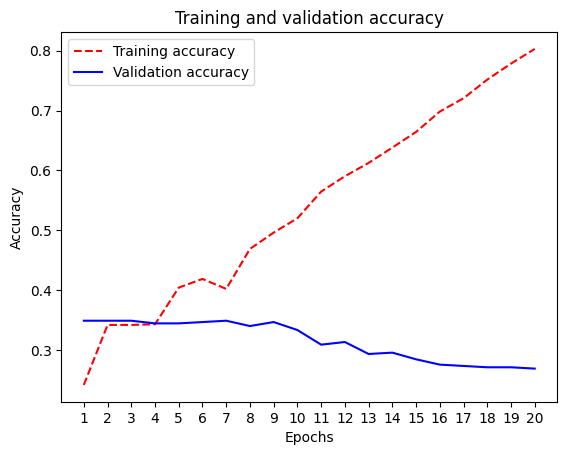

In [20]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

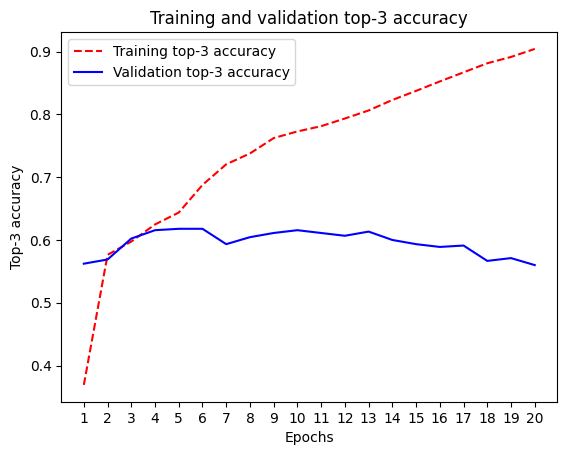

In [21]:
plt.clf()
acc = history.history["top_3_accuracy"]
val_acc = history.history["val_top_3_accuracy"]
plt.plot(epochs, acc, "r--", label="Training top-3 accuracy")
plt.plot(epochs, val_acc, "b", label="Validation top-3 accuracy")
plt.title("Training and validation top-3 accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Top-3 accuracy")
plt.legend()
plt.show()